In [1]:
#IMPORTACIÓN DE LIBRERÍAS PERTINENTES
%matplotlib ipympl
#What does this mean and why can't I comment in front of it? [?]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim #IDK HOW TO USE THIS [!]
from scipy import integrate

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
m = 0.1 #Kg
r = 0.1 #m
d = 0.3 #m
g = 9.81 #m/s^2

print("EN ESTA CELDA SE HACE LA CARACTERIZACIÓN FÍSICA DEL SISTEMA")

EN ESTA CELDA SE HACE LA CARACTERIZACIÓN FÍSICA DEL SISTEMA


In [3]:
I0 = ((m*(r**2))/4) + (m*(d**2))
Iz = ((m*(r**2))/2)

print("EN ESTA CELDA SE CALCULAN LOS MOMENTOS DE INERCIA ALREDEDOR DE LA DIRECCIÓN AZIMUTAL Y EN LA DIRECCIÓN DE GIRO DEL TROMPO (CONSTANTES)")

EN ESTA CELDA SE CALCULAN LOS MOMENTOS DE INERCIA ALREDEDOR DE LA DIRECCIÓN AZIMUTAL Y EN LA DIRECCIÓN DE GIRO DEL TROMPO (CONSTANTES)


In [4]:
y0 = np.array([0,0,((np.pi)/4),0]) #y =[φ,ψ,θ,dθdt]
t = np.linspace(0,8,10000) #0s a 8s en 10000 pasos
dψdt = 400 #rad/s

print("EN ESTA CELDA SE HACEN LAS CARACTERIZACIONES INICIAL Y TEMPORAL DEL SISTEMA")

EN ESTA CELDA SE HACEN LAS CARACTERIZACIONES INICIAL Y TEMPORAL DEL SISTEMA


In [5]:
pφ = Iz*dψdt*np.cos(y0[2])
pψ = Iz*dψdt

print("EN ESTA CELDA SE CALCULAN LOS MOMENTOS ANGULARES DEL SISTEMA (SE CONSERVAN)")

EN ESTA CELDA SE CALCULAN LOS MOMENTOS ANGULARES DEL SISTEMA (SE CONSERVAN)


In [6]:
#y =[φ,ψ,θ,dθdt]
def System(y, t, dψdt):

    φ,ψ,θ,θ_punto = y

    dψdt = dψdt
    #dφdt = dφdt
    dθdt = θ_punto
    #dθ_puntodt = dθ_puntodt

    dφdt = ( pφ - ( Iz*dψdt*(np.cos(θ)) ) ) / ( ( I0*((np.sin(θ))**2) ) + ( Iz*((np.cos(θ))**2) ) )
    dψdt = ( pψ - ( Iz*dφdt*(np.cos(θ)) ) ) / Iz
    dθ_puntodt = ( ((dψdt**2)*(np.sin(θ))*(np.cos(θ))*(I0-Iz)) - (dφdt*dψdt*Iz*(np.sin(θ))) + (m*g*d*(np.sin(θ))) ) / I0

    return np.array([dφdt, dψdt, dθdt, dθ_puntodt])

print("EN ESTA CELDA SE ESPECIFICA EL SISTEMA DE ECUACIONES DIFERENCIALES QUE DESCRIBE LA EVOLUCIÓN DEL TROMPO (DESPEJANDO LAS DERIVADAS TEMPORALES DE GRADO 1)")

EN ESTA CELDA SE ESPECIFICA EL SISTEMA DE ECUACIONES DIFERENCIALES QUE DESCRIBE LA EVOLUCIÓN DEL TROMPO (DESPEJANDO LAS DERIVADAS TEMPORALES DE GRADO 1)


In [7]:
solución_mejorada = integrate.odeint(System, y0, t, args=(dψdt,))

print("EN ESTA CELDA SE INTEGRA EL SISTEMA DE ECUACIONES DIFERENCIALES USANDO ODEINT")

EN ESTA CELDA SE INTEGRA EL SISTEMA DE ECUACIONES DIFERENCIALES USANDO ODEINT


In [8]:
#LA VELOCIDAD ANGULAR DE PRESECIÓN ES dφdt
#el tiempo que tarda en regresar al mismo punto x (es decir, en recorrer 2*pi) es:
φ = solución_mejorada[:,0]
θ = solución_mejorada[:,2]

x = d*np.sin(θ)*np.cos(φ)
x_inicial = x[0]

posición_regreso = np.where(x == x_inicial)
print(posición_regreso)

tiempo_regreso = t[64]

#entonces, la velocidad con que el trompo recorrió 2*pi es:
velocidad_de_precesión = (2*np.pi)/tiempo_regreso

print("EN ESTA CELDA SE CALCULA LA VELOCIDAD ANGULAR DE PRECESIÓN DEL SISTEMA COMO: " + str(velocidad_de_precesión) + " rad/s.")

#LA VELOCIDAD ANGULAR DE NUTACIÓN ES dψdt

(array([0], dtype=int64),)
EN ESTA CELDA SE CALCULA LA VELOCIDAD ANGULAR DE PRECESIÓN DEL SISTEMA COMO: 122.7061911845482 rad/s.


In [9]:
#fixed_system_to_body_system = np.array([[((np.cos(ψ)*np.cos(φ))-(np.cos(θ)*np.sin(φ)*np.sin(ψ))),((-np.sin(ψ)*np.cos(φ))-(np.cos(θ)*np.sin(φ)*np.cos(ψ))),(np.sin(θ)*np.sin(φ))],[((np.cos(ψ)*np.sin(φ))+(np.cos(θ)*np.cos(φ)*np.sin(ψ))),((-np.sin(ψ)*np.sin(φ))-(np.cos(θ)*np.cos(φ)*np.cos(ψ))),(-np.sin(θ)*np.cos(φ))],[(np.sin(ψ)*np.sin(θ)),(np.cos(ψ)*np.sin(θ)),(np.cos(θ))]])
#body_system_to_fixed_system = np.linalg.inv(fixed_system_to_body_system)
#np.shape(fixed_system_to_body_system, body_system_to_fixed_system)

In [10]:
#scale = 100
#t1 = t[::scale]
#φ = φ[::scale]
#ψ = ψ[::scale]
#θ = θ[::scale]

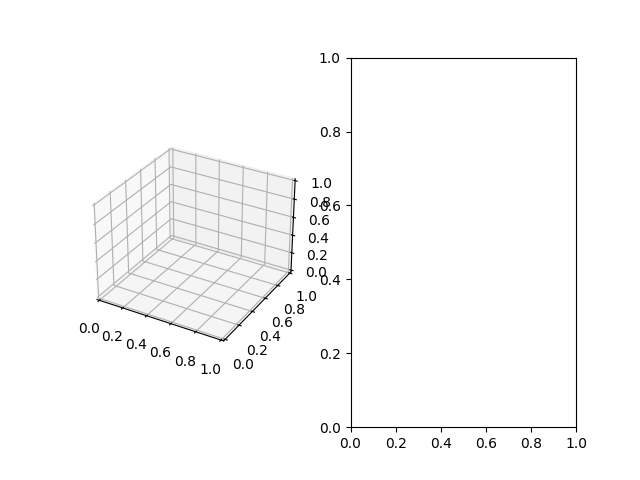

EN ESTA CELDA SE REALIZA UNA ANIMACIÓN DE LA POSICIÓN DEL CENTRO DEL TROMPO A LO LARGO DEL TIEMPO, HACIENDO UN CAMBIO DE COORDENADAS ESFÉRICAS A CARTESIANAS
TAMBIÉN SE ANIMA LA PROYECCIÓN DEL MOVIMIENTO DEL TROMPO SOBRE EL PLANO X-Y, PARA PODER OBSERVAR LA PRECESIÓN Y NUTACIÓN MEJOR


In [11]:
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122)

def init():
    ax.clear()
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_zlim(-0.5,0.5)

    ax1.clear()
    ax1.set_xlim(-0.5,0.5)
    ax1.set_ylim(-0.5,0.5)

def update(i):

    init()

    φ = solución_mejorada[:i,0]
    ψ = solución_mejorada[:i,1]
    θ = solución_mejorada[:i,2]
    
    x = d*np.sin(θ)*np.cos(φ)
    y = d*np.sin(θ)*np.sin(φ)
    z = d*np.cos(θ)

    ax.scatter(x,y,z)
    #ax.scatter(x,y,0,label="precesión y nutación")
    ax1.scatter(x,y)

    #ax.legend()
    ax1.set_title("Proyección sobre el plano x-y para observación de precesión y nutación")
    #ax1.legend()

animation = anim.FuncAnimation(fig=fig, func=update, frames=10000, init_func=init)
plt.show()

print("EN ESTA CELDA SE REALIZA UNA ANIMACIÓN DE LA POSICIÓN DEL CENTRO DEL TROMPO A LO LARGO DEL TIEMPO, HACIENDO UN CAMBIO DE COORDENADAS ESFÉRICAS A CARTESIANAS")
print("TAMBIÉN SE ANIMA LA PROYECCIÓN DEL MOVIMIENTO DEL TROMPO SOBRE EL PLANO X-Y, PARA PODER OBSERVAR LA PRECESIÓN Y NUTACIÓN MEJOR")